In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package(in lpa)')

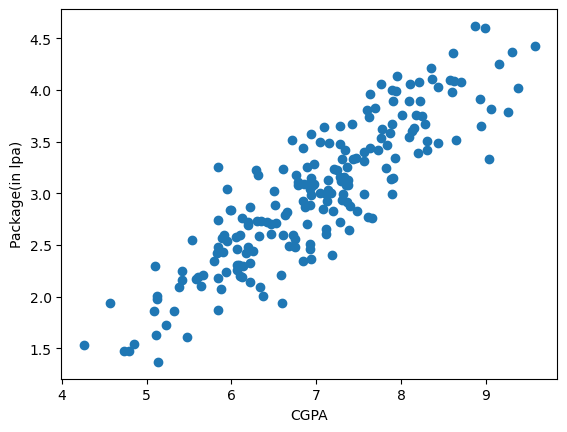

In [4]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [5]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lr = LinearRegression()

In [9]:
lr.fit(X_train,y_train)

LinearRegression()

In [10]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

C:\Users\SID\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

Text(0, 0.5, 'Package(in lpa)')

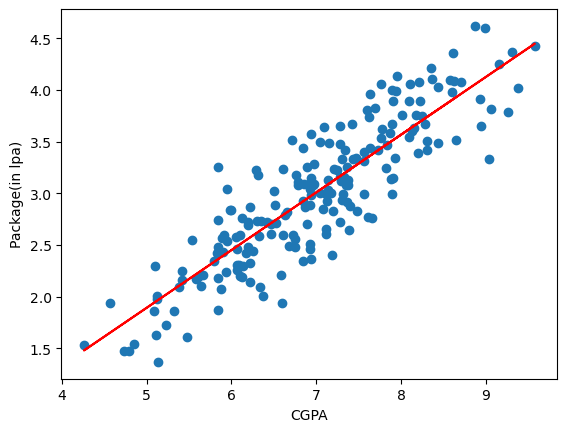

In [11]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [12]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [16]:
y_pred = lr.predict(X_test)

In [15]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [17]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [18]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [20]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [22]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.780730147510384


In [23]:
#Adjusted R2 score
X_test.shape

(40, 1)

In [24]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [25]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)
new_df1=new_df1[['cgpa','random_feature','package']]
new_df1.head()

# randomly adding a col

,cgpa,random_feature,package
0,6.89,0.131265,3.26
1,5.12,0.569894,1.98
2,7.82,0.272014,3.25
3,7.42,0.539758,3.67
4,6.94,0.406646,3.57


Text(0, 0.5, 'package in lpa')

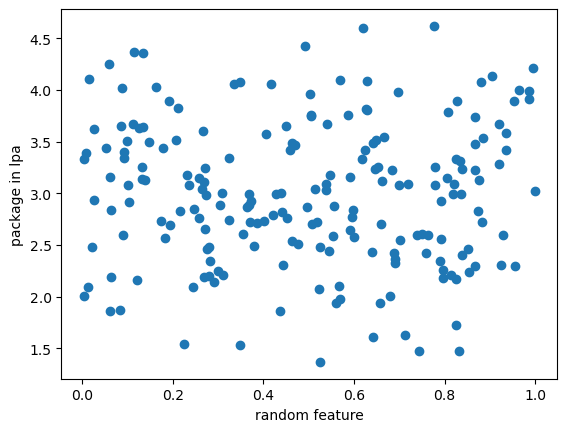

In [26]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random feature')
plt.ylabel('package in lpa')

# graph shows random feature is not relevant to package

In [27]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [29]:
lr=LinearRegression()

In [30]:
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [31]:
print("R2 score",r2_score(y_test,y_pred))
r2=r2_score(y_test,y_pred)

R2 score 0.7818029407810706


In [32]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.770008505147615

In [33]:
new_df2 = df.copy()
new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

# adding a col that does affect package 

In [34]:
new_df2.head()

,cgpa,iq,package
0,6.89,2.66,3.26
1,5.12,1.08,1.98
2,7.82,2.55,3.25
3,7.42,3.37,3.67
4,6.94,2.67,3.57


Text(0, 0.5, 'Package(in lpa)')

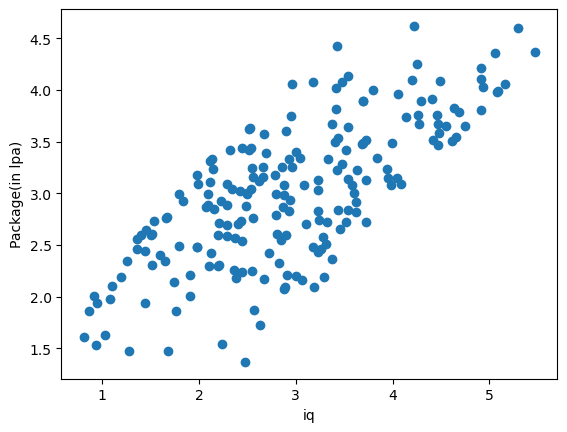

In [35]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

# graph shows iq is related to package

In [36]:

X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [38]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [39]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.824606271062996


In [40]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.815125528958293